****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df1 = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
df2 = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
df3 = pd.read_csv('WDO_2018-09-03_2018-09-28.csv')

frames = [df1, df2, df3]
result = pd.concat(frames)

#data_frame = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#data_frame = pd.read_csv('WDO_2018-07-02_2018-08-30.csv')
data_frame = result

In [3]:
data_frame.count()

Start                            31616
End                              31616
BuyOffersAmount                  31616
SellOffersAmount                 31616
NegociatedOffersAmount           31616
TotalTradedQuantity              31616
RSIIndicator                     31616
MACD                             31616
AroonIndicator                   31616
NormalizedClosePrice             31616
NormalizedMediumPrice            31616
NormalizedOpenPrice              31616
NormalizedSMAIndicator           31616
NormalizedEMAIndicator           31616
NormalizedUpperBollingerBand     31616
NormalizedLowerBollingerBand     31616
NormalizedMiddleBollingerBand    31616
NormalizedMaxBuyOffer            31616
NormalizedMinSellOffer           31616
NormalizedFirstTradePrice        31616
BuySignal                        31616
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.41387272267206476

In [5]:
train_y = data_frame['BuySignal']
train_x = data_frame.drop(['BuySignal'], axis=1)

In [6]:
train_x.count()

Start                            31616
End                              31616
BuyOffersAmount                  31616
SellOffersAmount                 31616
NegociatedOffersAmount           31616
TotalTradedQuantity              31616
RSIIndicator                     31616
MACD                             31616
AroonIndicator                   31616
NormalizedClosePrice             31616
NormalizedMediumPrice            31616
NormalizedOpenPrice              31616
NormalizedSMAIndicator           31616
NormalizedEMAIndicator           31616
NormalizedUpperBollingerBand     31616
NormalizedLowerBollingerBand     31616
NormalizedMiddleBollingerBand    31616
NormalizedMaxBuyOffer            31616
NormalizedMinSellOffer           31616
NormalizedFirstTradePrice        31616
dtype: int64

In [7]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,BuyOffersAmount,SellOffersAmount,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,MACD,AroonIndicator,NormalizedClosePrice,...,NormalizedOpenPrice,NormalizedSMAIndicator,NormalizedEMAIndicator,NormalizedUpperBollingerBand,NormalizedLowerBollingerBand,NormalizedMiddleBollingerBand,NormalizedMaxBuyOffer,NormalizedMinSellOffer,NormalizedFirstTradePrice,BuySignal
0,7/2/18 9:26:00 AM,7/2/18 9:31:00 AM,31633,39021,5041,11677,0.743590,2.652623,78.571429,0.956522,...,1.000000,0.999799,1.0,0.999688,0.999659,0.999799,1.0,1.0,0.823529,0
1,7/2/18 9:27:00 AM,7/2/18 9:32:00 AM,29212,37389,4423,10109,0.805556,0.279337,71.428571,0.954545,...,0.956522,1.000000,1.0,0.999911,0.999839,1.000000,1.0,1.0,0.823529,1
2,7/2/18 9:28:00 AM,7/2/18 9:33:00 AM,30597,39726,4952,11272,0.800000,0.401636,64.285714,1.000000,...,0.954545,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1
3,7/2/18 9:29:00 AM,7/2/18 9:34:00 AM,31317,40595,5215,12139,0.805556,0.467743,50.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1
4,7/2/18 9:30:00 AM,7/2/18 9:35:00 AM,31681,41508,5359,12676,0.800000,0.325605,50.000000,0.916667,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1


In [8]:
col = data_frame['BuyOffersAmount']
data_frame['BuyOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = data_frame['SellOffersAmount']
data_frame['SellOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = data_frame['NegociatedOffersAmount']
data_frame['NegociatedOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = data_frame['TotalTradedQuantity']
data_frame['TotalTradedQuantity'] = (col - col.min())/(col.max() - col.min())

col = data_frame['MACD']
data_frame['MACD'] = (col - col.min())/(col.max() - col.min())

col = data_frame['AroonIndicator']
data_frame['AroonIndicator'] = (col - col.min())/(col.max() - col.min())

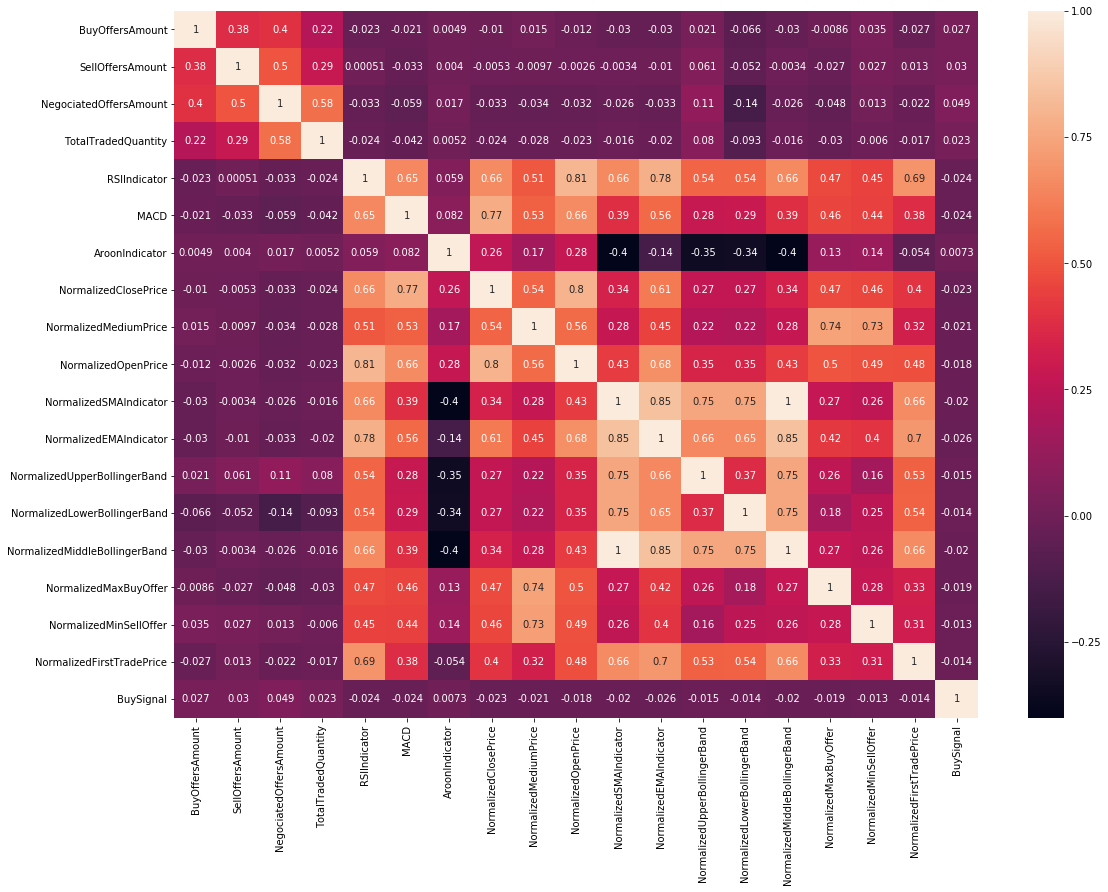

In [9]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
y_train = data_frame["BuySignal"]
#x_train = data_frame.drop(["BuySignal", "Start", "End"], axis=1)
x_train = data_frame.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
x_train.head()


,BuyOffersAmount,SellOffersAmount,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,MACD,AroonIndicator,NormalizedSMAIndicator,NormalizedEMAIndicator,NormalizedUpperBollingerBand,NormalizedLowerBollingerBand,NormalizedMiddleBollingerBand
0,0.186297,0.250766,0.242001,0.006630,0.743590,0.859126,0.923077,0.999799,1.0,0.999688,0.999659,0.999799
1,0.172039,0.240278,0.212309,0.005740,0.805556,0.574277,0.884615,1.000000,1.0,0.999911,0.999839,1.000000
2,0.180195,0.255297,0.237725,0.006400,0.800000,0.588956,0.846154,1.000000,1.0,1.000000,1.000000,1.000000
3,0.184436,0.260882,0.250360,0.006893,0.805556,0.596890,0.769231,1.000000,1.0,1.000000,1.000000,1.000000
4,0.186579,0.266749,0.257279,0.007198,0.800000,0.579831,0.769231,1.000000,1.0,1.000000,1.000000,1.000000


In [12]:
clf = MLPClassifier(hidden_layer_sizes=[100])
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
#test_df = pd.read_csv('WDO_2018-08-31_2018-08-31.csv')
test_df = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
original_y = test_df['BuySignal']


In [14]:
col = test_df['BuyOffersAmount']
test_df['BuyOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = test_df['SellOffersAmount']
test_df['SellOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = test_df['NegociatedOffersAmount']
test_df['NegociatedOffersAmount'] = (col - col.min())/(col.max() - col.min())

col = test_df['TotalTradedQuantity']
test_df['TotalTradedQuantity'] = (col - col.min())/(col.max() - col.min())


col = test_df['MACD']
test_df['MACD'] = (col - col.min())/(col.max() - col.min())

col = test_df['AroonIndicator']
test_df['AroonIndicator'] = (col - col.min())/(col.max() - col.min())

#test_df = test_df.drop(["BuySignal", "Start", "End"], axis=1)
test_df = test_df.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
y_test_df = clf.predict(test_df)

In [15]:
clf.score(test_df, original_y)

0.6753812636165577

In [16]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [17]:
a = perf_measure(original_y.values.tolist(), y_test_df.tolist())
a

(2, 2, 308, 147)

In [18]:
accuracy = (a[0] + a[2])/(a[0] + a[1] + a[2] + a[3]) 
precision = a[0]/ (a[0] + a[1])

print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))

Accuracy: 0.6753812636165577
Precision: 0.5


In [19]:
P_1 = a[0]/(a[0] + a[1])

In [20]:
P_2 = a[2]/(a[2] + a[3])

In [21]:
print ("Probabilidade de acertar um sinal de compra: " + str(P_1 * 100) + "%")

Probabilidade de acertar um sinal de compra: 50.0%


In [22]:
print ("Probabilidade de acertar uma não-compra: " + str(P_2 * 100) + "%")

Probabilidade de acertar uma não-compra: 67.6923076923077%


In [23]:
print ("Distribuicao de BuySignal = 1: " + str(len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)))

Distribuicao de BuySignal = 1: 0.41387272267206476


In [24]:
print ("Distribuicao de BuySignal = 0: " + str(len(data_frame[data_frame['BuySignal'] == 0].index)/len(data_frame.index)))

Distribuicao de BuySignal = 0: 0.5861272773279352


In [25]:
from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(hidden_layer_sizes=[100])
scores = cross_val_score(mlp, x_train, y_train, scoring = 'balanced_accuracy')

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
scores

array([0.50022107, 0.49922144, 0.49865715])